In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [195]:
df = pd.read_csv('sales.csv')
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [197]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [198]:
valores_perdidos = df.isnull().sum()
valores_perdidos

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [199]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df_limpio = df.dropna(subset=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address'])

In [201]:
df_limpio.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [202]:
print(df['Price Each'].unique())
print("---------------------------")
print(df['Quantity Ordered'].unique())
print("---------------------------")

['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' nan '700.0' '1700.0' '150.0' '300.0' '400.0']
---------------------------
['1' '2' '4' '3' 'Quantity Ordered' nan '7' '5' '6' '8' '9']
---------------------------


In [203]:
import pandas as pd

# Filtrar filas que contienen 'Price Each' o 'Quantity Ordered'
df = df[~df["Price Each"].isin(["Price Each"])]
df = df[~df["Quantity Ordered"].isin(["Quantity Ordered"])]
df = df[~df["Purchase Address"].isin(["Purchase Address"])]


# Eliminar NaNs en las columnas relevantes
df = df.dropna(subset=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address'])

# Convertir a valores numéricos
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

# Verificar los valores únicos después de la limpieza
print(df["Price Each"].unique())
print("---------------------------")
print(df["Quantity Ordered"].unique())
print("---------------------------")


[1700.    600.     11.95  149.99    3.84   99.99    2.99  999.99   14.95
   11.99  150.    400.    700.    109.99  379.99  300.    389.99]
---------------------------
[1 2 4 3 7 5 6 8 9]
---------------------------


In [204]:
### Analisis descriptivo

In [205]:
df.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [206]:
conteo_producto = df['Product'].value_counts()
conteo_producto

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [207]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df['Order Date'] = df['Order Date'].apply(lambda x: x.split(' ')[0].strip())
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19,"136 Church St, New York City, NY 10001",New York City
1,295666,LG Washing Machine,1,600.00,12/29/19,"562 2nd St, New York City, NY 10001",New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19,"277 Main St, New York City, NY 10001",New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19,"410 6th St, San Francisco, CA 94016",San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19,"43 Hill St, Atlanta, GA 30301",Atlanta
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19,"795 Pine St, Boston, MA 02215",Boston
186846,222906,27in FHD Monitor,1,149.99,06/01/19,"495 North St, New York City, NY 10001",New York City
186847,222907,USB-C Charging Cable,1,11.95,06/22/19,"319 Ridge St, San Francisco, CA 94016",San Francisco
186848,222908,USB-C Charging Cable,1,11.95,06/26/19,"916 Main St, San Francisco, CA 94016",San Francisco


In [208]:
conteo_ciudades = df['City'].value_counts().sort_index()
conteo_ciudades

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: count, dtype: int64

In [209]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df

C:\Users\pablo\AppData\Local\Temp\ipykernel_13396\2299850567.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30,"136 Church St, New York City, NY 10001",New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29,"562 2nd St, New York City, NY 10001",New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12,"277 Main St, New York City, NY 10001",New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22,"410 6th St, San Francisco, CA 94016",San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18,"43 Hill St, Atlanta, GA 30301",Atlanta
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215",Boston
186846,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001",New York City
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016",San Francisco
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016",San Francisco


In [210]:
conteo_fechas = df['Order Date'].dt.month.value_counts().sort_index()
conteo_fechas

Order Date
1      9709
2     11975
3     15153
4     18279
5     16566
6     13554
7     14293
8     11961
9     11621
10    20282
11    17573
12    24984
Name: count, dtype: int64

In [211]:
### visualizar datos descriptivos

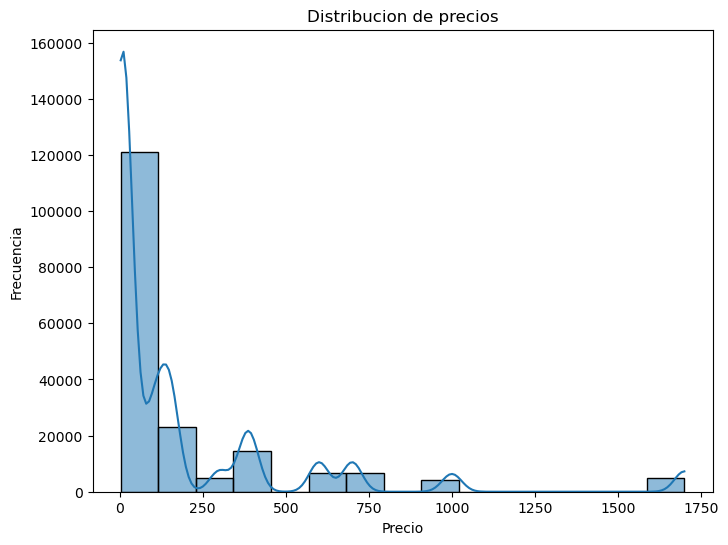

In [212]:
#Distribucion de precios
plt.figure(figsize=(8,6))
sns.histplot(df['Price Each'], bins=15, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribucion de precios')
plt.show()

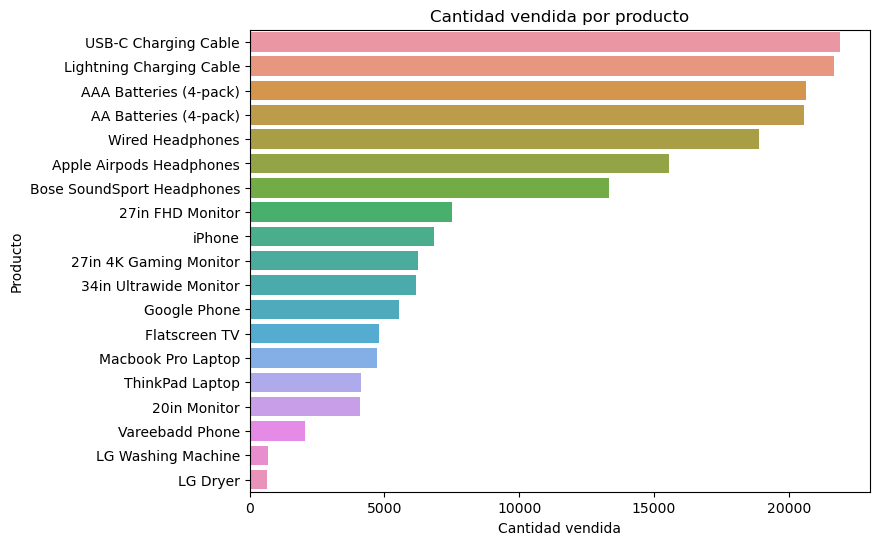

In [213]:
#Conteo de productos vendidos
plt.figure(figsize=(8,6))
sns.countplot(data = df, y=df['Product'], order = df['Product'].value_counts().index)
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.title('Cantidad vendida por producto')
plt.show()

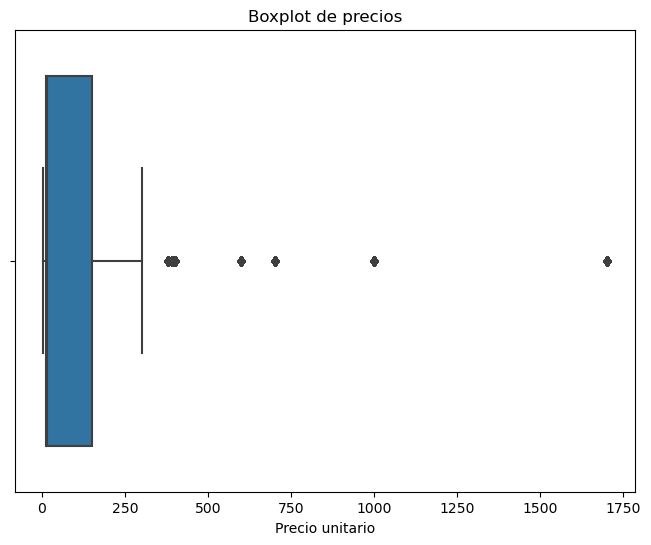

In [214]:
# Boxplot de precios
plt.figure(figsize=(8,6))
sns.boxplot(x = df['Price Each'])
plt.xlabel('Precio unitario')
plt.title('Boxplot de precios')
plt.show()

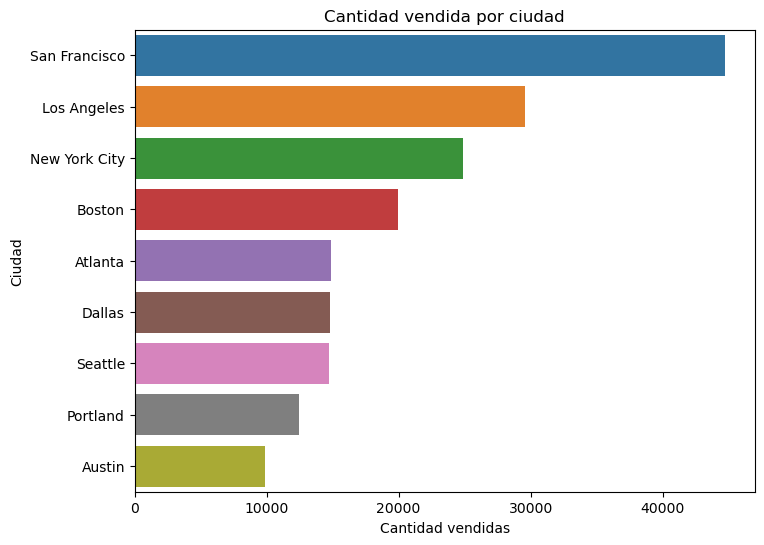

In [215]:
# ventas por ciudad
city_order = df['City'].value_counts().index
plt.figure(figsize=(8,6))
sns.countplot(data = df, y='City', order = city_order)
plt.xlabel('Cantidad vendidas')
plt.ylabel('Ciudad')
plt.title('Cantidad vendida por ciudad')
plt.show()

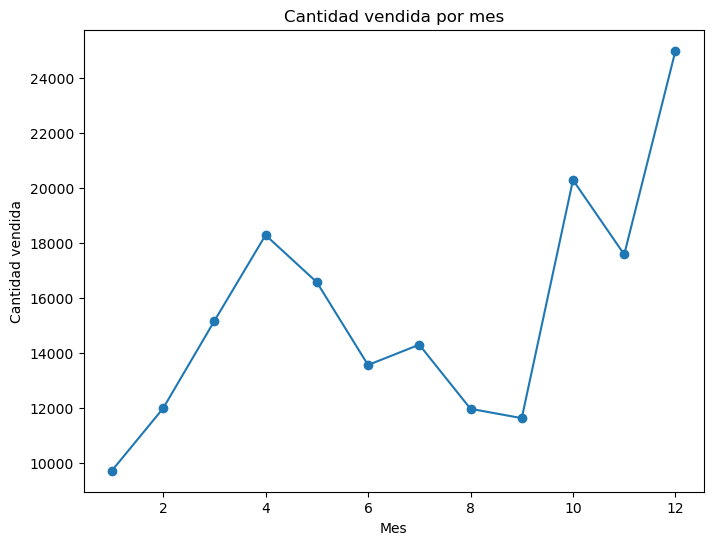

In [216]:
#ventas mensuales por mes
df['Month'] = df['Order Date'].dt.month
ventas_mensuales = df['Month'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad vendida')
plt.title('Cantidad vendida por mes')
plt.show()

### ANALISIS DE FRECUENCIAS Y PROPORCIONES 

In [217]:
frecuencia_compra = df['Product'].value_counts()
frecuencia_ciudades = df['City'].value_counts()
proporcion_compra = df['Product'].value_counts(normalize=True)
proporcion_ciudades = df['City'].value_counts(normalize=True)
print(frecuencia_compra)
print(frecuencia_ciudades)
print(proporcion_compra)
print(proporcion_ciudades)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64
City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64
Product
USB-C Charging Cable          0.1177

In [218]:
# tablas cruzada (unidades de productos vendidas por ciudad)
tabla_cruzada = pd.crosstab(df['City'], df['Product'])
tabla_cruzada

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta,338,492,584,478,1661,1598,1263,1077,405,451,59,52,1754,379,357,1773,173,1445,542
Austin,228,318,356,328,1071,1091,882,694,242,274,55,26,1227,251,210,1144,108,1023,377
Boston,394,673,793,669,2215,2301,1642,1402,551,592,59,72,2323,478,446,2333,214,2025,752
Dallas,340,479,580,511,1693,1650,1187,1055,419,461,44,51,1720,382,345,1691,178,1515,519
Los Angeles,654,1003,1217,953,3289,3313,2452,2099,724,845,116,105,3512,751,641,3454,317,3043,1117
New York City,555,840,1069,865,2675,2773,2079,1771,625,758,77,85,2861,656,559,2978,279,2490,881
Portland,277,433,528,402,1437,1359,1089,883,311,355,37,37,1435,337,274,1458,124,1240,449
San Francisco,993,1456,1803,1442,4903,4932,3705,3287,1149,1355,143,180,5174,1134,963,5368,493,4592,1660
Seattle,322,536,577,533,1633,1624,1250,1057,374,434,56,58,1652,356,333,1704,179,1509,545


In [219]:
#esto es lo mismo que lo de arriba
producto_ciudad = df.groupby('City')['Product'].value_counts()
producto_ciudad

City     Product                 
Atlanta  USB-C Charging Cable        1773
         Lightning Charging Cable    1754
         AA Batteries (4-pack)       1661
         AAA Batteries (4-pack)      1598
         Wired Headphones            1445
                                     ... 
Seattle  ThinkPad Laptop              333
         20in Monitor                 322
         Vareebadd Phone              179
         LG Washing Machine            58
         LG Dryer                      56
Name: count, Length: 171, dtype: int64

In [220]:
productos_caros = df.loc[df['Price Each'] > 1000]
productos_caros['City'].value_counts(normalize=True)

City
San Francisco    0.240051
Los Angeles      0.158975
New York City    0.138865
Boston           0.101185
Dallas           0.080864
Atlanta          0.080229
Seattle          0.075360
Portland         0.071338
Austin           0.053133
Name: proportion, dtype: float64

### GRAFICOS 

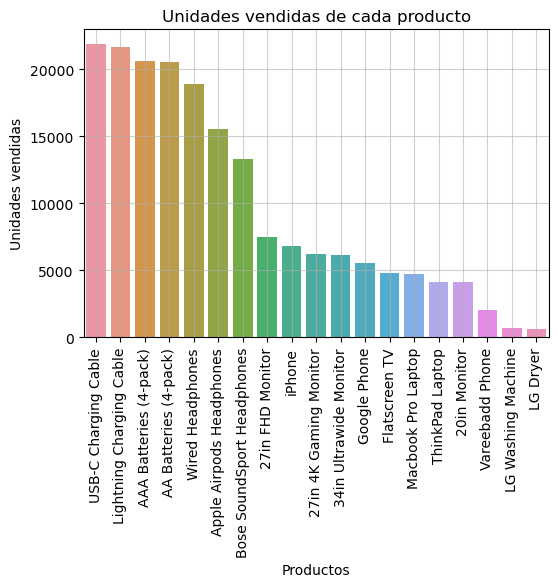

In [221]:
#grafico de barras de unidades de producto vendidas  
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas')
plt.title('Unidades vendidas de cada producto')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.6)
plt.show()

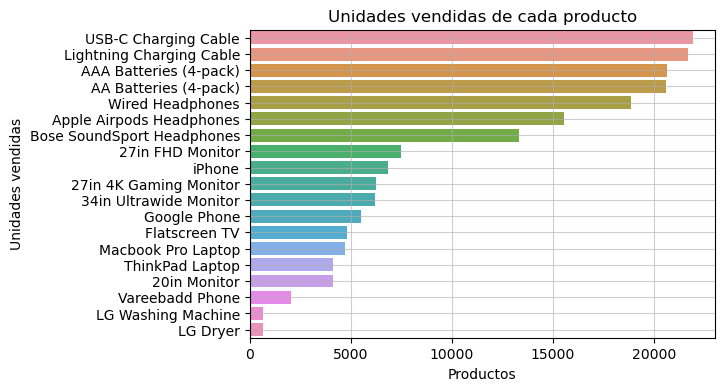

In [222]:
#grafico de barras de unidades de producto vendidas
#igual que el de arriba pero cambiando la x por la y
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas')
plt.title('Unidades vendidas de cada producto')
plt.grid(True, alpha=0.6)
plt.show()

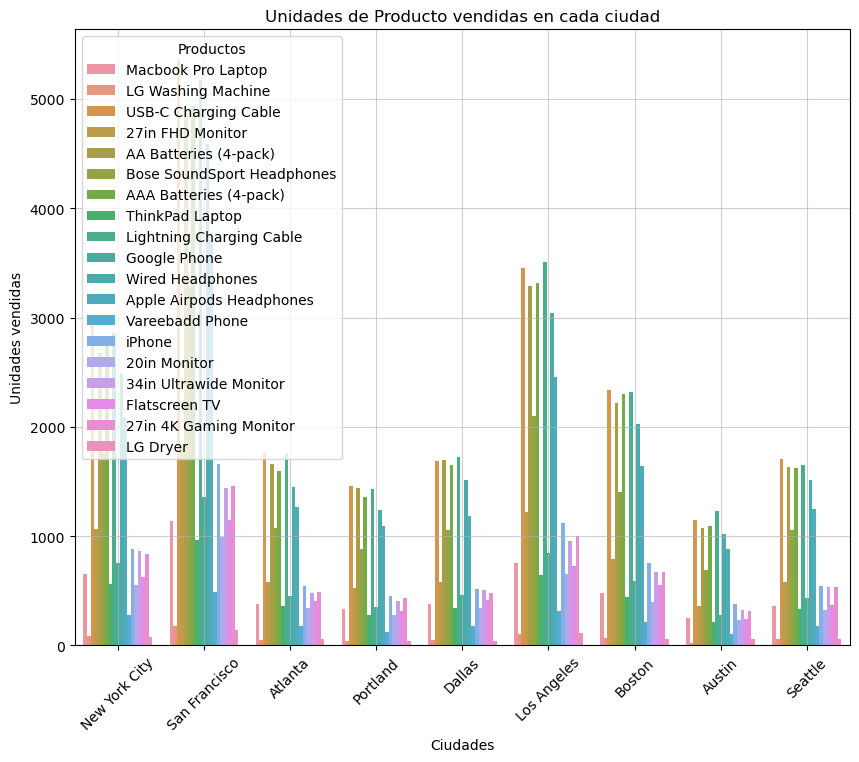

In [223]:
# frecuecnia de producos vendidos por ciudad
# grafico de barras de unidades de producto vendidas  
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='City', hue ='Product')
plt.xlabel('Ciudades')
plt.ylabel('Unidades vendidas')
plt.title('Unidades de Producto vendidas en cada ciudad')
plt.xticks(rotation=45)
plt.legend(title='Productos', loc='upper left')
plt.grid(True, alpha=0.6)
plt.show()

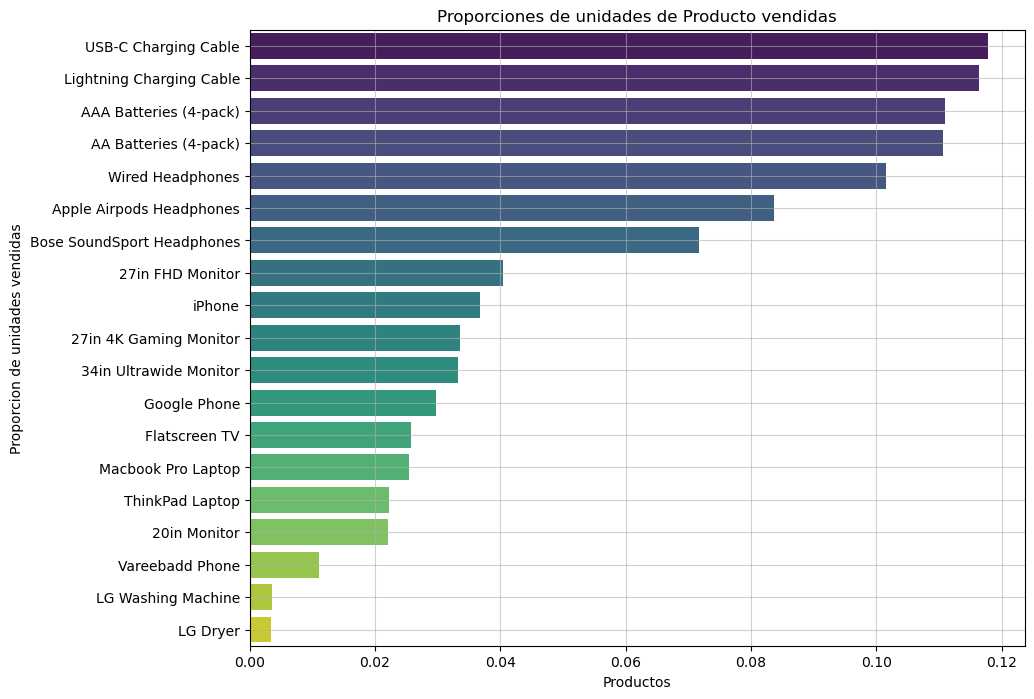

In [224]:
# grafico de barras de las proporciones de productos vendidos

proporcion_producto = df['Product'].value_counts(normalize=True).reset_index()
proporcion_producto.columns = ['Product', 'Proporcion']

plt.figure(figsize=(10,8))
sns.barplot(data=proporcion_producto, y='Product', x ='Proporcion', palette = 'viridis')
plt.xlabel('Productos')
plt.ylabel('Proporcion de unidades vendidas')
plt.title('Proporciones de unidades de Producto vendidas')
plt.grid(True, alpha=0.6)
plt.show()

In [225]:
plt.pie?

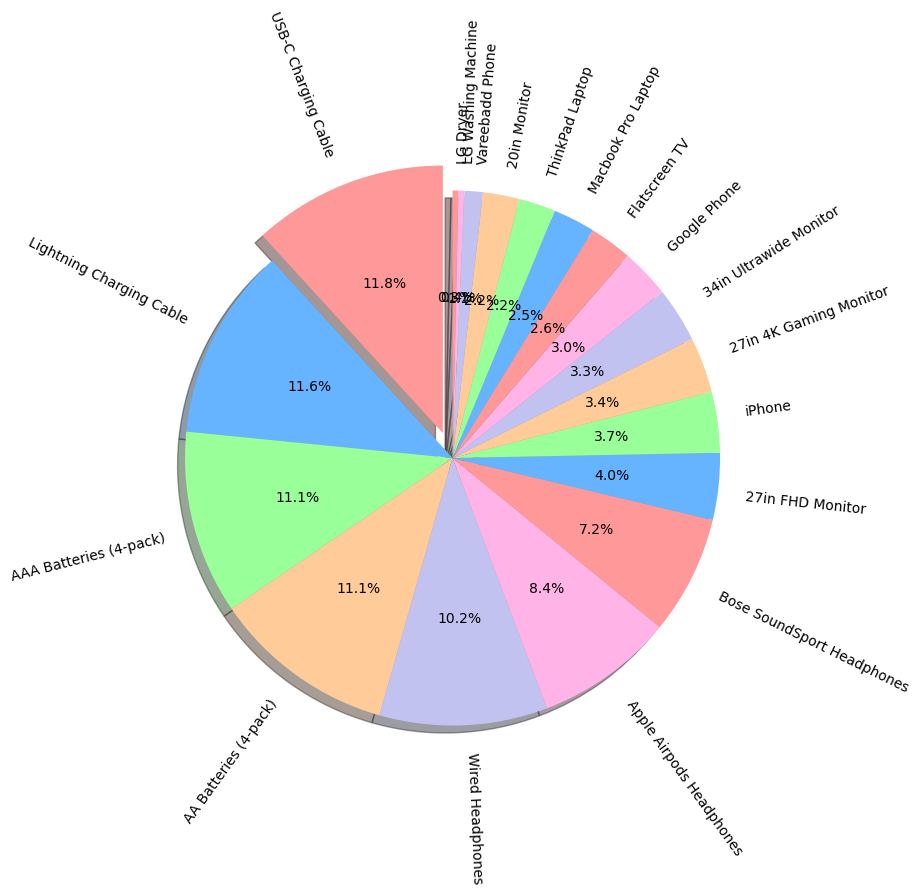

In [226]:
# diagramas de Tarta de productos vendidos (con porcentajes)
productos = df['Product'].value_counts()
color = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
explode = [0.1]+[0] * (len(productos)-1)
plt.figure(figsize=(10,8))
plt.pie(productos, labels = productos.index, autopct = '%1.1f%%', startangle = 90, rotatelabels = True, colors = color, explode=explode, shadow=True)
plt.axis('equal')
plt.show()

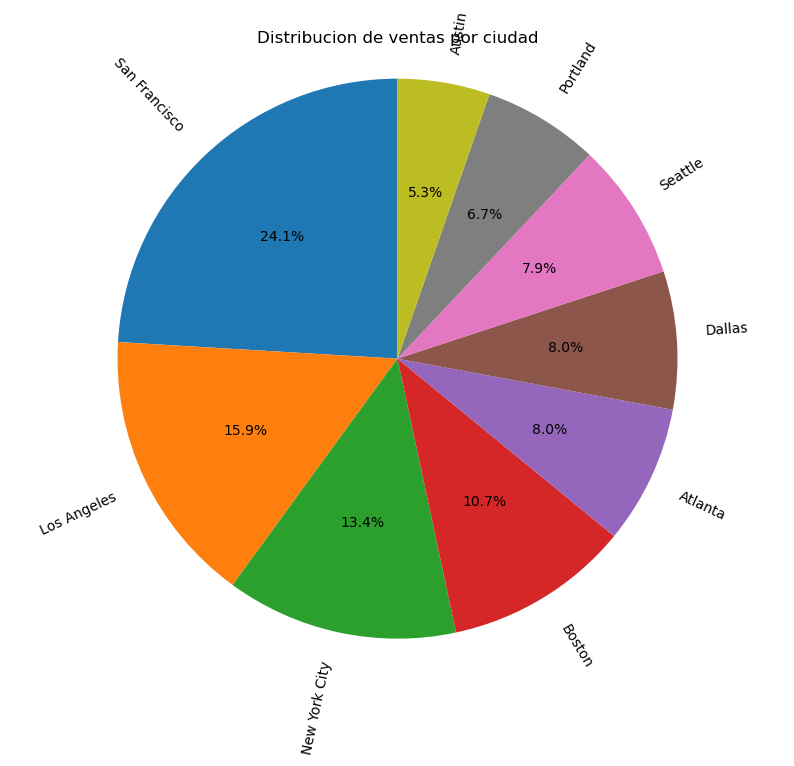

In [227]:
# diagramas de Tarta de la distribucion de las ventas por ciudad(con porcentajes)
ciudad = df['City'].value_counts()
color = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
explode = [0.1]+[0] * (len(productos)-1)
plt.figure(figsize=(10,8))
plt.pie(ciudad, labels = ciudad.index, autopct = '%1.1f%%', startangle = 90, rotatelabels = True)
plt.title('Distribucion de ventas por ciudad')
plt.axis('equal')
plt.show()

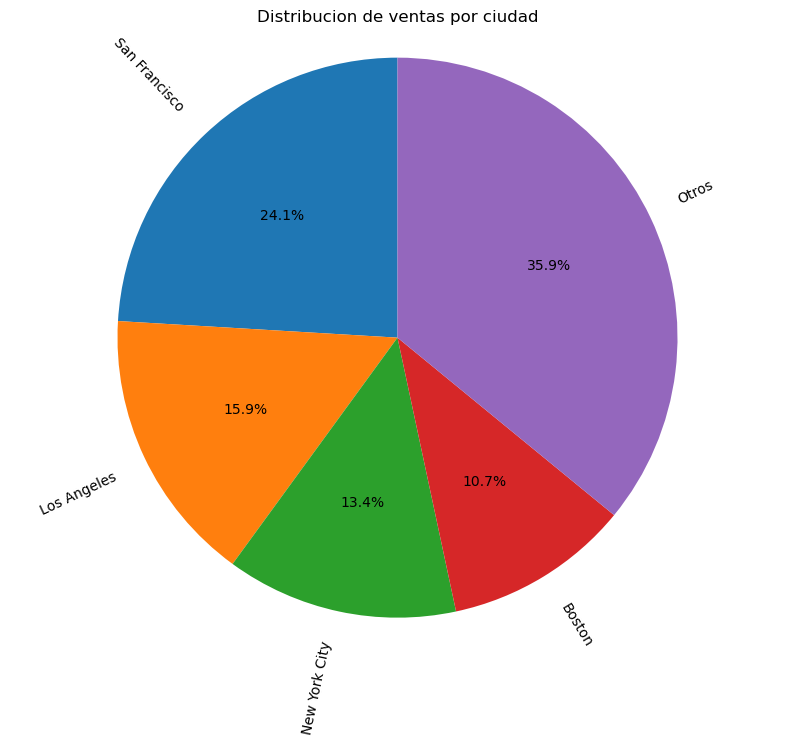

In [228]:
# diagramas de Tarta de la distribucion de las ventas por ciudad (las que superen el limite)
limite = 15000
ciudad['Otros'] = ciudad[ciudad < limite].sum()
ciudad = ciudad[ciudad >= limite]

plt.figure(figsize=(10,8))
plt.pie(ciudad, labels = ciudad.index, autopct = '%1.1f%%', startangle = 90, rotatelabels = True)
plt.title('Distribucion de ventas por ciudad')
plt.axis('equal')
plt.show()

### Analisis de correlacion 

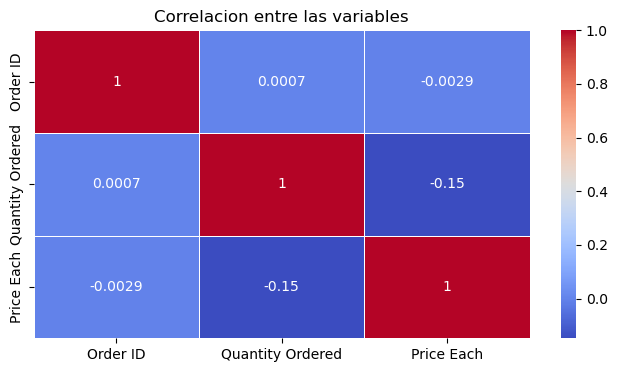

In [229]:
correlacion = df[['Order ID', 'Quantity Ordered', 'Price Each']].corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlacion, annot=True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlacion entre las variables')
plt.show()

In [230]:
valor_correlacion = df['Price Each'].corr(df['Quantity Ordered'])
valor_correlacion

-0.14827234034551487

### graficos dispersion 

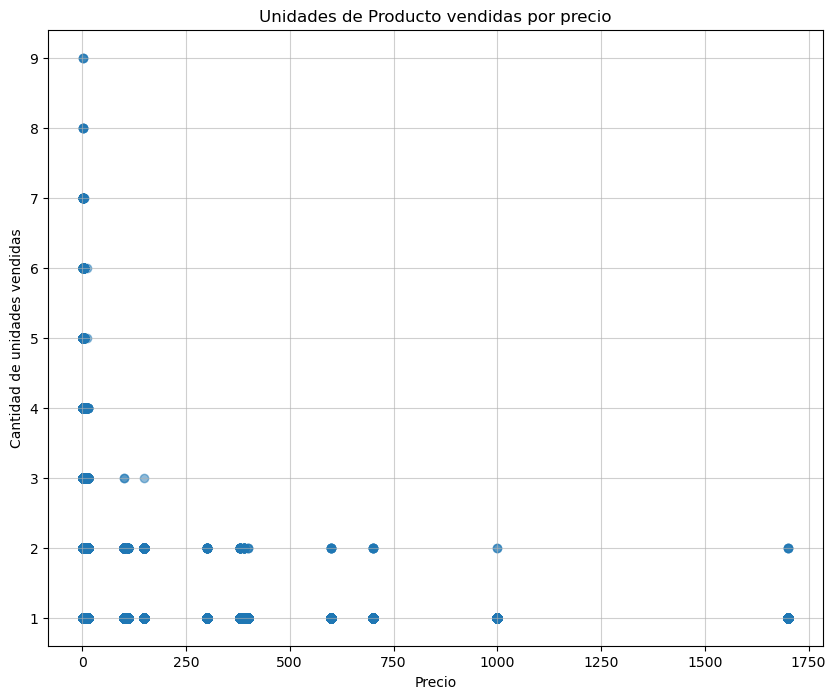

In [231]:
#dispersion del numero de productos vendidos en funcion de su precio
plt.figure(figsize=(10,8))
plt.scatter(df['Price Each'], df['Quantity Ordered'], alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Cantidad de unidades vendidas')
plt.title('Unidades de Producto vendidas por precio')
plt.grid(True, alpha=0.6)
plt.show()

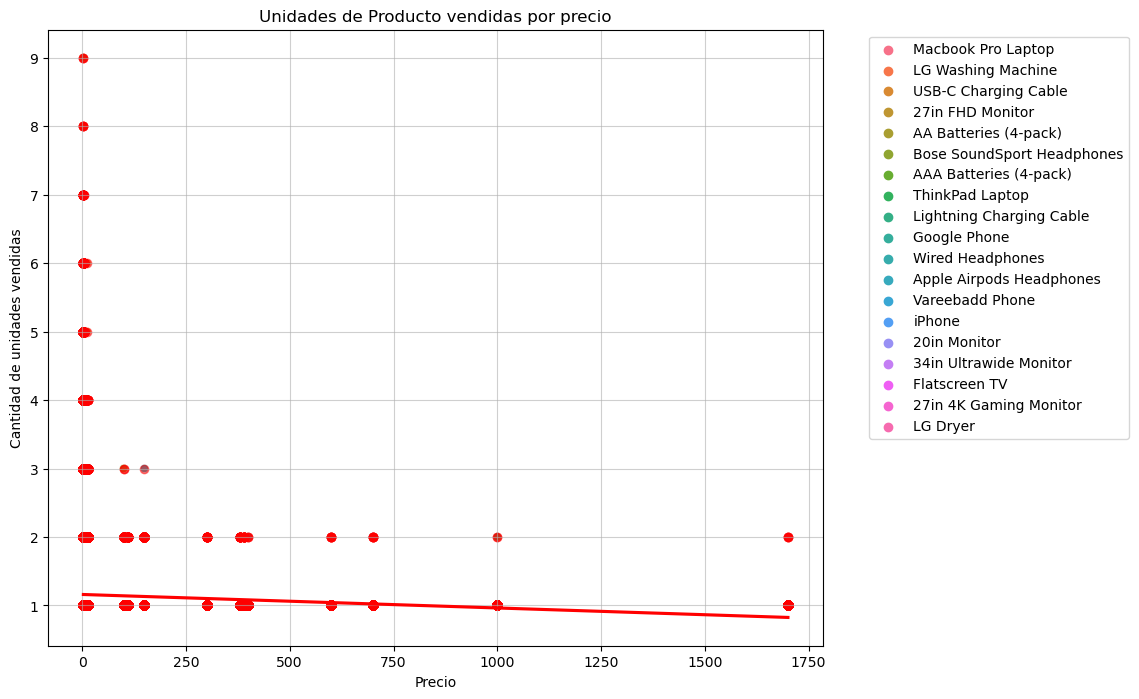

In [232]:
#dispersion de los productos vendidos en funcion de su precio (con linea de tendencia)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Price Each', y='Quantity Ordered', hue='Product', data=df)
sns.regplot(data=df, x='Price Each', y = 'Quantity Ordered', scatter_kws={'alpha':0.5}, color='red')
plt.xlabel('Precio')
plt.ylabel('Cantidad de unidades vendidas')
plt.title('Unidades de Producto vendidas por precio')
plt.legend(bbox_to_anchor =(1.05,1), loc='upper left')
plt.grid(True, alpha=0.6)
plt.show()

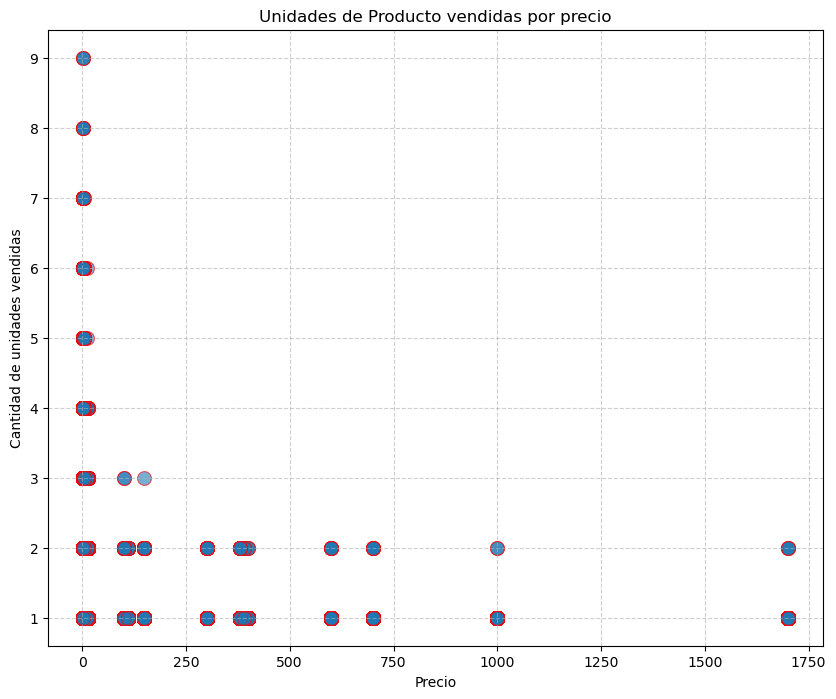

In [233]:
#dispersion de los cantidades vendidas en funcion de su precio (con s=100 es para el tamaño)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Price Each', y='Quantity Ordered', s=100, alpha=0.6, edgecolor = 'red', data=df)
plt.xlabel('Precio')
plt.ylabel('Cantidad de unidades vendidas')
plt.title('Unidades de Producto vendidas por precio')
plt.grid(True, alpha=0.6, linestyle = '--')
plt.show()

### Regresion lineal y multiple

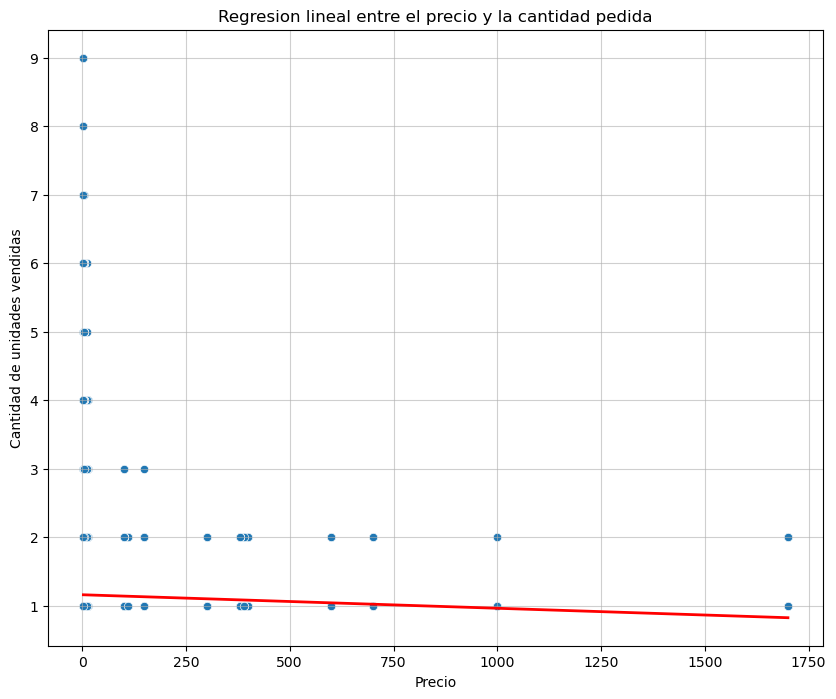

In [234]:
#regresion lineal
X = df[['Price Each']] #variable independiente
y = df['Quantity Ordered'] #variable dependiente

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Precio')
plt.ylabel('Cantidad de unidades vendidas')
plt.title('Regresion lineal entre el precio y la cantidad pedida')
plt.grid(True, alpha=0.6)
plt.show()

#la linea nos enseña como seria una relacion lineal entre las dos variables

In [235]:
#evaluar el modelo (este modelo solamente es capaz de explicar el 2,1% de los datos)
r_squared = model.score(X,y)
r_squared

0.02198468691153621

In [236]:
#Regresion multiple

df['Order_month'] = pd.to_datetime(df['Order Date'], errors = 'coerce').dt.month

X = df[['Price Each', 'Order_month']] #variable independiente
y = df['Quantity Ordered'] #variable dependiente

model_multi = LinearRegression()
model_multi.fit(X, y)
y_pred = model_multi.predict(X)


r_squared = model_multi.score(X, y)
print(r_squared)
print(model_multi.intercept_)
print(model_multi.coef_)

#este modelo solo explica el 2,1% de los datos

0.021984771364585987
1.1605087428055842
[-1.97316749e-04  3.67342247e-05]


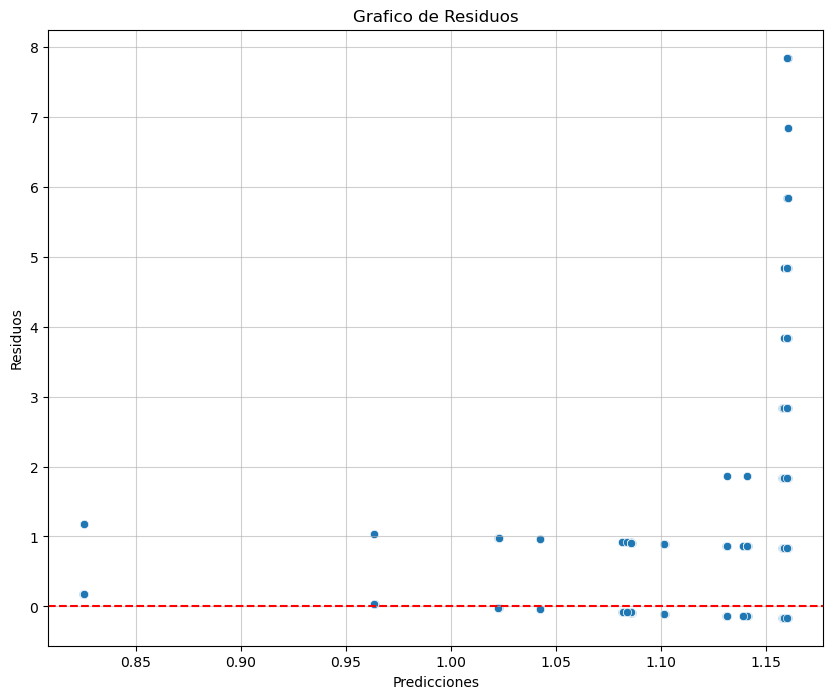

In [237]:
#Calculamos los residuos (para verificar que los datos estan distribuidos aleatoriamente, lo que indica que el modelo es adecuado)
residuos = y-model_multi.predict(X)

plt.figure(figsize=(10,8))
sns.scatterplot(x=model_multi.predict(X), y=residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Grafico de Residuos')
plt.grid(True, alpha=0.6)
plt.axhline(0, linestyle = '--', color='red')
plt.show()

In [238]:
## deberian de distribuirse aleatoriamente cerca de la linea roja. no es asi, supongo que el modelo es insuficiente

### Analisis de datos temporales

In [239]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   City              185950 non-null  object        
 7   Month             185950 non-null  int32         
 8   Order_month       185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 12.8+ MB


In [240]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Day of week'] = df['Order Date'].dt.day_name()
df['Hour'] = df['Order Date'].dt.hour
df.set_index('Order Date', inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City,Month,Order_month,Year,Day,Day of week,Hour
Order Date,,,,,,,,,,,,
2019-12-30,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",New York City,12,12,2019,30,Monday,0
2019-12-29,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",New York City,12,12,2019,29,Sunday,0
2019-12-12,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",New York City,12,12,2019,12,Thursday,0
2019-12-22,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",San Francisco,12,12,2019,22,Sunday,0
2019-12-18,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",Atlanta,12,12,2019,18,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-07,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",Boston,6,6,2019,7,Friday,0
2019-06-01,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",New York City,6,6,2019,1,Saturday,0
2019-06-22,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",San Francisco,6,6,2019,22,Saturday,0


Order Date
2019-01-31    10862
2019-02-28    13449
2019-03-31    17005
2019-04-30    20558
2019-05-31    18667
2019-06-30    15253
2019-07-31    16072
2019-08-31    13448
2019-09-30    13109
2019-10-31    22703
2019-11-30    19798
2019-12-31    28114
2020-01-31       41
Freq: M, Name: Quantity Ordered, dtype: int64


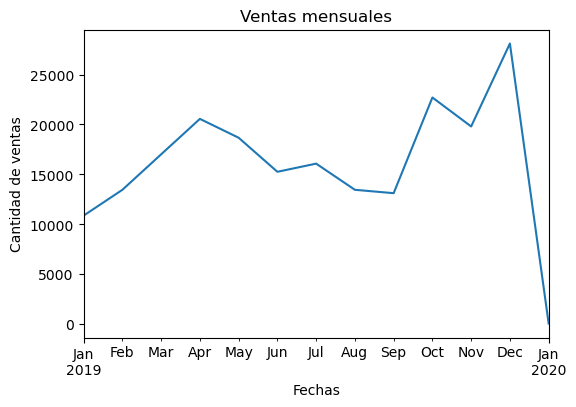

In [241]:
#grafico de las ventas por mes

ventas_mes = df['Quantity Ordered'].resample('M').sum()
print(ventas_mes)
plt.figure(figsize=(6,4))
ventas_mes.plot()
plt.xlabel('Fechas')
plt.ylabel('Cantidad de ventas')
plt.title('Ventas mensuales')
plt.show()

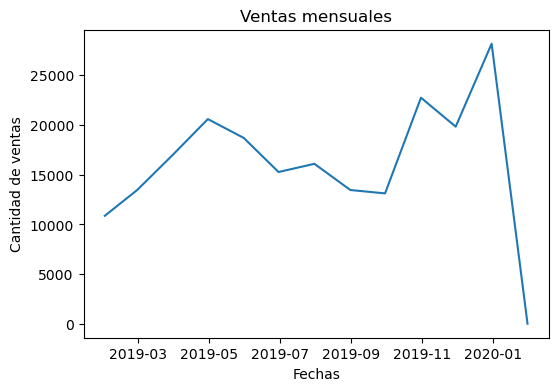

In [242]:
#ventas por mes con Seaborn

plt.figure(figsize=(6,4))
sns.lineplot(data=ventas_mes)
plt.xlabel('Fechas')
plt.ylabel('Cantidad de ventas')
plt.title('Ventas mensuales')
plt.show()

### Descomponer series temporales

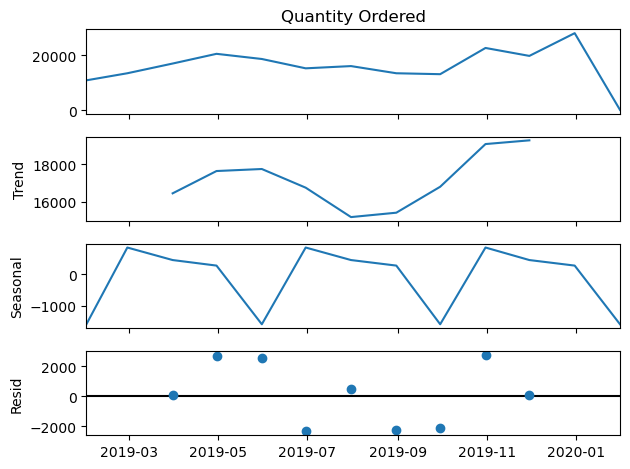

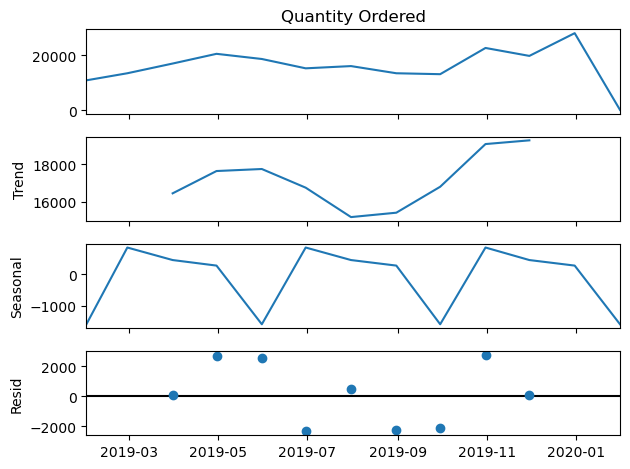

In [243]:
# se necesitan 2 ciclos minimo. por lo que si tenemos datos de 12 meses, tenemos que descomponerlo como minimo en 6 meses
descomponer = seasonal_decompose(ventas_mes, model='additive', period=4)
descomponer.plot()

### comparar ventas por productos en concreto

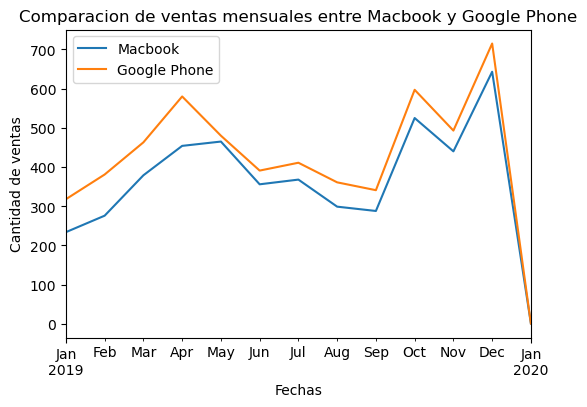

In [245]:
plt.figure(figsize=(6,4))
df[df['Product'] == 'Macbook Pro Laptop']['Quantity Ordered'].resample('M').sum().plot(label='Macbook')
df[df['Product'] == 'Google Phone']['Quantity Ordered'].resample('M').sum().plot(label='Google Phone')
plt.xlabel('Fechas')
plt.ylabel('Cantidad de ventas')
plt.title('Comparacion de ventas mensuales entre Macbook y Google Phone')
plt.legend()
plt.show()